In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')
%matplotlib inline
import pandas as pd
import numpy as np

In [75]:
#results_edited_filename = "out_bio_publish.csv"
#results_null_filename = "out_null_publish.csv"

results_edited_filename = "out_bio_publish.csv"
results_null_filename = "out_null_publish.csv"

df = pd.read_csv(results_edited_filename)
df.loc[:, 'title'] = df.iloc[:,0].str.extract(r"/([A-Za-z \(\)]+)_edited.txt")

df0 = pd.read_csv(results_null_filename)
df0.loc[:, 'title'] = df0.iloc[:,0].str.extract(r"/([A-Za-z \(\)]+).txt")
# df.columns = ['file', 'length', 'edit rate', 'HC', 'pvalue', 'precision', 'recall']
df['F1'] = 2 * df['precision'] * df['recall'] / (df['precision'] + df['recall'])
df_disp = df.merge(df0, on = 'title', suffixes=["", " (null)"], how='inner').filter(
    ['title', 'length', 'HC (null)', 'HC_pvalue (null)', 'edit_rate','HC', 'HC_pvalue', 'F1']).dropna()

def round_and_bold(x):
    if x < 0.05:
        return f"\\color{{blue}} \\textbf{{{np.round(x,4)}}}"
    else: 
        return f"{np.round(x,4)}"

df_disp.loc[df_disp['HC_pvalue'] > 0.05, 'F1'] = "NA"
df_disp.loc[:,'length'] = df_disp['length'].apply(lambda x: f"{int(x)}")
df_disp.loc[:, 'title'] = df_disp['title'].apply(lambda x: f"\\texttt{{{x}}}")
df_disp.loc[:, 'HC_pvalue (null)'] = df_disp['HC_pvalue (null)'].apply(round_and_bold)
df_disp.loc[:, 'HC_pvalue'] = df_disp['HC_pvalue'].apply(round_and_bold)
aa = df_disp.set_index('title')
print(aa.to_latex(float_format=lambda x: '%.3f' % x))

\begin{tabular}{llrlrrll}
\toprule
 & length & HC (null) & HC_pvalue (null) & edit_rate & HC & HC_pvalue & F1 \\
title &  &  &  &  &  &  &  \\
\midrule
\texttt{Franz Kafka} & 58 & 1.600 & 0.0901 & 0.219 & 1.996 & \color{blue} \textbf{0.0197} & 0.216 \\
\texttt{George Simenon} & 66 & 1.872 & \color{blue} \textbf{0.0404} & 0.183 & 2.443 & \color{blue} \textbf{0.0028} & 0.316 \\
\texttt{Anton Chekhov} & 60 & 0.972 & 0.4359 & 0.221 & 1.641 & 0.0789 & NA \\
\texttt{Toni Morrison} & 54 & 0.772 & 0.5778 & 0.220 & 0.874 & 0.4934 & NA \\
\texttt{Hermann Hesse} & 61 & 0.970 & 0.4417 & 0.200 & 1.899 & \color{blue} \textbf{0.0322} & 0.545 \\
\texttt{Jane Austin} & 57 & 1.071 & 0.3595 & 0.230 & 2.724 & \color{blue} \textbf{0.0003} & 0.444 \\
\texttt{Anne Rice} & 48 & 0.576 & 0.6798 & 0.189 & 1.725 & \color{blue} \textbf{0.0443} & 0.286 \\
\texttt{JK Rowling} & 54 & 0.533 & 0.7056 & 0.293 & 1.898 & \color{blue} \textbf{0.0261} & 0.486 \\
\texttt{Yukio Mishima} & 57 & 0.962 & 0.414 & 0.333 & 2.235 & 

In [117]:
for name in  ["Anne Rice", "Anton Chekhov", 
            #"Edgar Allan Poe",
            "Franz Kafka",
            "Jane Austin",
            #"Hermeann Hesse",
            "JK Rowling", "Roald Dahl", "Toni Morrison",
                "Yukio Mishima"]:
    fn = f"results/{name}_edited_sentences.csv"
    df_edited = pd.read_csv(fn)
    df_null = pd.read_csv(f"results/{name}_sentences.csv")

    def set_tag(r):
        if r['tag'] == '<edit>':
            if not r['mask']:
                return '<remove edit> ' + r['sentence'] + ' </remove edit>'
            else:
                return '<edit> ' + r['sentence'] + ' </edit>'
        else:
            return r['sentence']

    df_edited.loc[:, 'sentence'] = df_edited.apply(set_tag, axis=1)

    output_file = f"Data/Bio/mixed/{name}_edited1.txt"
    with open (output_file, 'w') as f:
        f.write("\n".join(df_edited['sentence']))
    print("Saved marked text to ", output_file)


Saved marked text to  Data/Bio/mixed/Anne Rice_edited1.txt
Saved marked text to  Data/Bio/mixed/Anton Chekhov_edited1.txt
Saved marked text to  Data/Bio/mixed/Franz Kafka_edited1.txt
Saved marked text to  Data/Bio/mixed/Jane Austin_edited1.txt
Saved marked text to  Data/Bio/mixed/JK Rowling_edited1.txt
Saved marked text to  Data/Bio/mixed/Roald Dahl_edited1.txt
Saved marked text to  Data/Bio/mixed/Toni Morrison_edited1.txt
Saved marked text to  Data/Bio/mixed/Yukio Mishima_edited1.txt


## Sentences in a single article

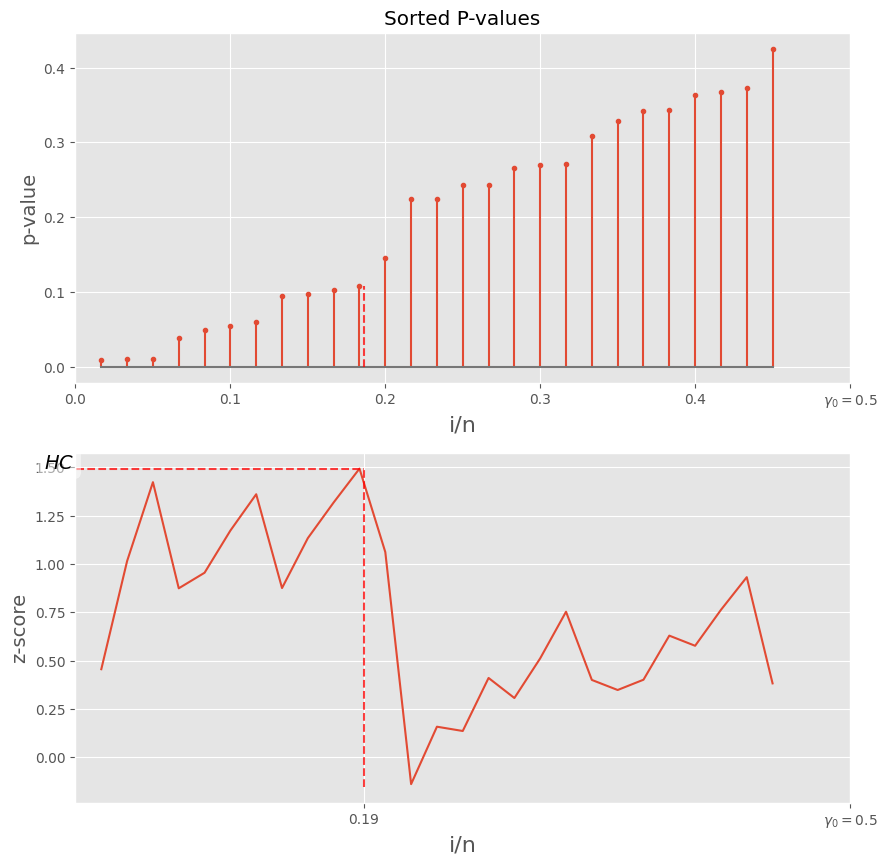

(1.4925783532718189, 0.1083)


/var/folders/3n/c1thdb3136qc3c_4t5br9r6c0000gq/T/ipykernel_56688/1098204810.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_disp[~df_disp.pvalue.isna()].sort_values('pvalue')[df_disp['mask']]


,Unnamed: 0,sentence,response,pvalue,context,comment,mask,tag,len
55,55,\textcolor{blue}Stanislavski wrote :״Chekhov o...,4.771,0.0093,NaN,OK,True,<edit>,26
13,13,The intersection of his medical and...,3.685,0.0098,NaN,OK,True,no edits,28
28,28,The profound insights and nuanced characteriza...,3.920,0.0098,NaN,OK,True,no edits,28
56,56,\textcolor{blue}the characters often feel and ...,4.401,0.0385,NaN,OK,True,<edit>,14
45,45,"In summary, Anton Chekhov's major contribution...",3.444,0.0492,NaN,OK,True,no edits,30
8,8,"This event, coupled with the responsibility...",3.365,0.0544,NaN,OK,True,no edits,28
19,19,"\textcolor{blue}""The Steppe"" has been called a...",3.339,0.0600,NaN,OK,True,<edit>,39
32,32,He challenged traditional theatrical conventio...,3.462,0.0948,NaN,OK,True,no edits,24
18,18,"\textcolor{blue}In 1887, exhausted from overwo...",3.410,0.0975,NaN,OK,True,<edit>,32
11,11,Juggling medical studies with his literary...,3.797,0.1029,NaN,OK,True,no edits,19


In [3]:
file_name = "results/Anton Chekhov_edited_sentences.csv"

MIN_LEN = 10
df_doc1 = pd.read_csv(file_name)
df_doc1['len'] = df_doc1.sentence.apply(lambda x : len(x.split()))
df_doc1 = df_doc1[df_doc1.len > MIN_LEN]

df_disp = df_doc1
df_disp.loc[:, 'response'] = df_disp['response'].apply(lambda x : np.round(x,3))
df_disp.loc[:, 'pvalue'] = df_disp['pvalue'].apply(lambda x : np.round(x,4))
df_disp.loc[df_disp.tag == '<edit>', 'sentence'] = '\\textcolor{blue}' + df_disp.loc[df_disp.tag == '<edit>', 'sentence']

df_disp['sentence'] = df_disp['sentence'].apply(lambda x : " ".join(x.split()[:6]) + "...")


a = df_disp.filter(['sentence', 'response', 'pvalue'])
b = df_disp[df_disp['mask']].filter(['sentence', 'pvalue']).sort_values('pvalue')

from multitest import MultiTest
pvals = df_disp['pvalue']
mt = MultiTest(pvals[~np.isnan(pvals)], stbl=True)
mt.hc_dashboard(gamma=0.45)
print(mt.hc(gamma=0.45))

df_disp[~df_disp.pvalue.isna()].sort_values('pvalue')[df_disp['mask']]

In [38]:
print(df_disp.drop(['context', 'tag', 'mask', 'Unnamed: 0'], axis=1).to_latex())

\begin{tabular}{llrrlr}
\toprule
 & sentence & response & pvalue & comment & len \\
\midrule
2 & The Welsh Corgi, often simply referred... & 2.765000 & 0.210600 & OK & 29 \\
3 & Renowned for their distinctive appearance, characterized... & 2.864000 & 0.247400 & OK & 23 \\
4 & \textcolor{blue}Originally bred to herd cattle, sheep,... & 2.484000 & 0.597200 & OK & 21 \\
5 & This article delves into the fascinating... & 3.005000 & 0.444400 & OK & 16 \\
6 & From their origin as indispensable herding... & 3.682000 & 0.040000 & OK & 38 \\
7 & Moreover, we examine the different varieties... & 3.400000 & 0.058400 & OK & 22 \\
8 & Join us on this journey to... & 2.460000 & 0.289000 & OK & 31 \\
10 & The history of the Corgi breed... & 2.565000 & 0.540200 & OK & 24 \\
11 & \textcolor{blue}Corgi breeds are classified as Pembroke... & 2.327000 & 0.820700 & OK & 17 \\
12 & \textcolor{blue}The breeds are named for the... & 3.156000 & 0.161800 & OK & 18 \\
13 & Pembroke Welsh Corgi: The Pembroke Welsh

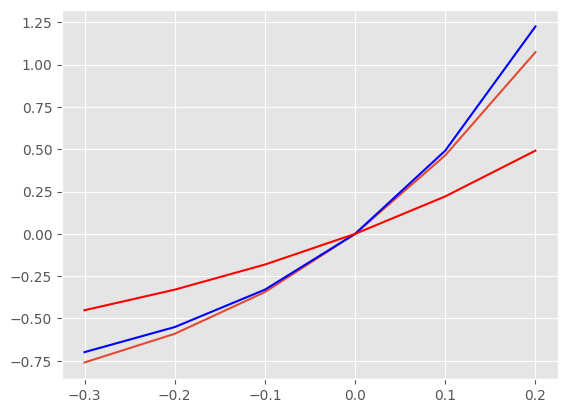

In [22]:
aa = np.arange(-.3,.3, 0.1)
m = 4
f = (1 + aa) ** m - 1
plt.plot(aa, f)
plt.plot(aa, np.exp(m*aa) - 1, color='blue')
plt.plot(aa, np.exp(m*aa/2) - 1, color='red')

In [215]:
print("General")
n_head = 9
n_tail = 3
df_sent = pd.concat([a.head(n_head), a.tail(n_tail)])
df_sent['sentence'] = df_sent['sentence'].apply(lambda x : " ".join(x.split()[:5]) + "...")
print(df_sent.to_latex(index=False))

General
\begin{tabular}{lrr}
\toprule
sentence & response & pvalue \\
\midrule
The Welsh Corgi, often simply... & 2.765000 & 0.212000 \\
Renowned for their distinctive appearance,... & 2.864000 & 0.242400 \\
\textcolor{blue}Originally bred to herd cattle,... & 2.484000 & 0.649000 \\
This article delves into the... & 3.005000 & 0.490400 \\
From their origin as indispensable... & 3.682000 & 0.041700 \\
Moreover, we examine the different... & 3.400000 & 0.116700 \\
Join us on this journey... & 2.460000 & 0.309300 \\
The history of the Corgi... & 2.565000 & 0.539500 \\
\textcolor{blue}Corgi breeds are classified as... & 2.266000 & 0.818700 \\
Overall, Welsh Corgis have become... & 2.456000 & 0.459400 \\
\textcolor{blue}They have surpassed their humble... & 3.906000 & 0.105700 \\
Their unique combination of historical... & 3.284000 & 0.077900 \\
\bottomrule
\end{tabular}



In [220]:
print("HCT")
n_head = 9
n_tail = 7
df_HCT = pd.concat([b.head(n_head), b.tail(n_tail)])
print(df_HCT.to_latex(index=False))

HCT
\begin{tabular}{lr}
\toprule
sentence & pvalue \\
\midrule
Despite their herding heritage gradually diminishing,... & 0.011300 \\
Corgi-themed fundraisers and charity events have... & 0.021100 \\
Legend has it that the fairies... & 0.034600 \\
\textcolor{blue}It is believed that the Cardigan... & 0.040000 \\
From their origin as indispensable herding... & 0.041700 \\
Cardigan Corgis were also adept herding... & 0.043500 \\
Their unique combination of historical significance,... & 0.077900 \\
\textcolor{blue}They have appeared in several animated... & 0.082000 \\
\textcolor{blue}They have surpassed their humble origins... & 0.105700 \\
They excelled at driving cattle and... & 0.177000 \\
Today, Welsh Corgis, especially the Pembroke,... & 0.185100 \\
Mascots and Symbols: In some regions,... & 0.188300 \\
Here are some ways in which... & 0.194200 \\
\textcolor{blue}The breeds are named for the... & 0.206500 \\
\textcolor{blue}A Welsh Corgi appeared with Queen... & 0.211400 \\
The Wels

In [228]:
14 + 81

95

General
\begin{tabular}{lrrl}
\toprule
sentence & response & pvalue & tag \\
\midrule
The Welsh Corgi, often simply... & 2.764900 & 0.212000 & not edit \\
Renowned for their distinctive appearance,... & 2.864000 & 0.242400 & not edit \\
Originally bred to herd cattle,... & 2.484400 & 0.649000 & <edit> \\
This article delves into the... & 3.004800 & 0.490400 & not edit \\
From their origin as indispensable... & 3.682400 & 0.041700 & not edit \\
Moreover, we examine the different... & 3.399900 & 0.116700 & not edit \\
Join us on this journey... & 2.459500 & 0.309300 & not edit \\
The history of the Corgi... & 2.564700 & 0.539500 & not edit \\
Corgi breeds are classified as... & 2.265500 & 0.818700 & <edit> \\
Corgi-themed fundraisers and charity events... & 3.635700 & 0.021100 & not edit \\
Overall, Welsh Corgis have become... & 2.456000 & 0.459400 & not edit \\
They have surpassed their humble... & 3.906100 & 0.105700 & <edit> \\
Their unique combination of historical... & 3.284100 & 0.

In [117]:
print(b.to_latex())

\begin{tabular}{llrr}
\toprule
 & sentence & response & pvalue \\
\midrule
0 & July 18 2023. & 4.780900 & NaN \\
1 & Welsh Corgi.

Introduction.
 & 4.839000 & NaN \\
2 & The Welsh Corgi, often simply referred to as Corgi, is a charming and beloved breed of herding dog with roots deeply entwined in the landscapes and folklore of Wales.
 & 2.764900 & 0.212000 \\
3 & Renowned for their distinctive appearance, characterized by their short legs and elongated bodies, Welsh Corgis have captured the hearts of dog enthusiasts worldwide.
 & 2.864000 & 0.242400 \\
4 & Originally bred to herd cattle, sheep, and horses, Corgis are celebrated for their intelligence, agility, unwavering loyalty, and eagerness to please. & 2.484400 & 0.649000 \\
5 & This article delves into the fascinating history, characteristics, and unique attributes of the Welsh Corgi breed.
 & 3.004800 & 0.490400 \\
6 & From their origin as indispensable herding aides in the verdant fields of Wales to their prominence as cherishe

In [107]:
a['response'] = a['response'].round(2)
a['pvalue'] = a['pvalue'].round(4)
print(a.head(6).to_latex(decimal=4))

TypeError: replace() argument 2 must be str, not int

In [108]:
? a.to_latex

Signature:
 a.to_latex(
    buf: 'FilePath | WriteBuffer[str] | None' = None,
    columns: 'Sequence[Hashable] | None' = None,
    header: 'bool_t | Sequence[str]' = True,
    index: 'bool_t' = True,
    na_rep: 'str' = 'NaN',
    formatters: 'FormattersType | None' = None,
    float_format: 'FloatFormatType | None' = None,
    sparsify: 'bool_t | None' = None,
    index_names: 'bool_t' = True,
    bold_rows: 'bool_t' = False,
    column_format: 'str | None' = None,
    longtable: 'bool_t | None' = None,
    escape: 'bool_t | None' = None,
    encoding: 'str | None' = None,
    decimal: 'str' = '.',
    multicolumn: 'bool_t | None' = None,
    multicolumn_format: 'str | None' = None,
    multirow: 'bool_t | None' = None,
    caption: 'str | tuple[str, str] | None' = None,
    label: 'str | None' = None,
    position: 'str | None' = None,
) -> 'str | None'
Docstring:
Render object to a LaTeX tabular, longtable, or nested table.

Requires ``\usepackage{{booktabs}}``.  The output can be c

In [51]:
df_doc0 = df_disp

In [52]:
pval0 = df_doc0.sort_values('pvalue').pvalue.dropna().values
pval1 = df_doc1.sort_values('pvalue').pvalue.dropna().values

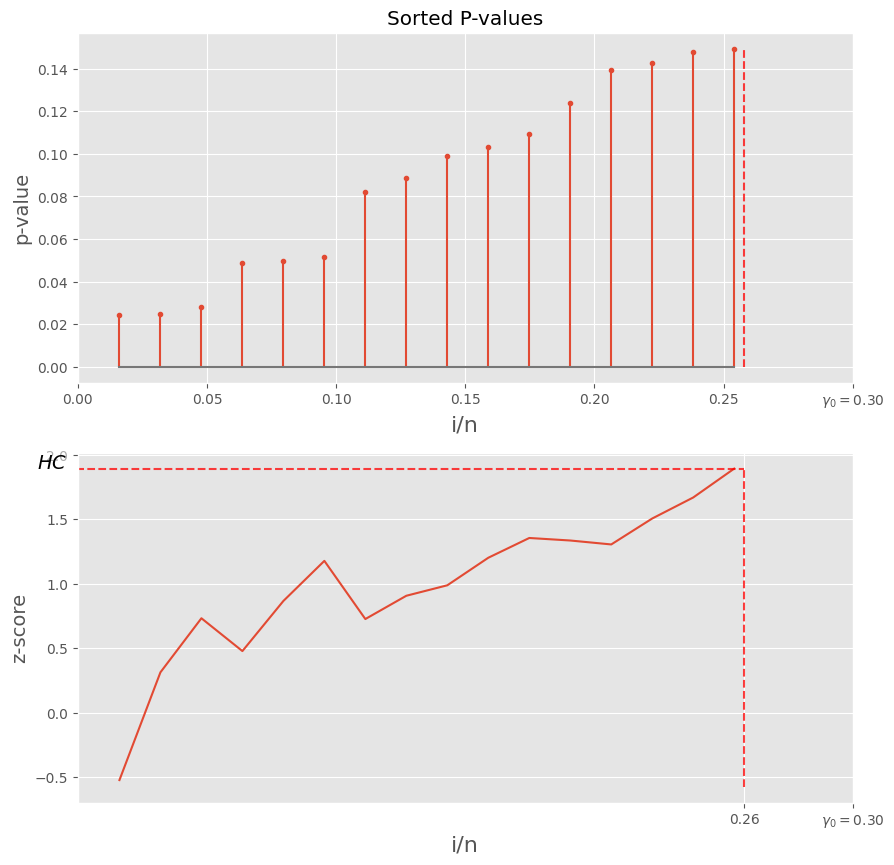

(1.8936251543151155, 0.1494)


In [55]:
from multitest import MultiTest
pvals = pval0
mt = MultiTest(pvals[~np.isnan(pvals)])
mt.hc_dashboard(gamma=0.25)
print(mt.hc(gamma=.25))


In [65]:
G = 47
from text_detect import get_survival_function

#no-context-null-data-file: "results/gpt2-xl_no_context_wiki-long_machine.csv"
#no-context-null-data-file: "results/gpt2-xl_no_context_news-long_machine.csv"
#no-context-null-data-file: "results/gpt2-xl_no_context_abstracts_machine.csv"

df_null = pd.read_csv("results/gpt2-xl_no_context_files_machine.csv")
pval_functions = get_survival_function(df_null[df_null.num > 1], G=G)

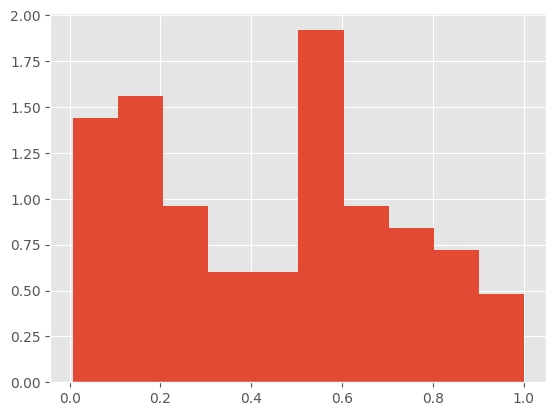

In [68]:
df_doc1['len'] = df_doc1.sentence.apply(lambda x : len(x.split()))
min_len = 10
new_pvals = np.array([pval_functions(l, r)[0][0] for l,r in zip(df_doc1['len'], df_doc1['response']) if l >= min_len ])
plt.hist(new_pvals, density=True); plt.show()

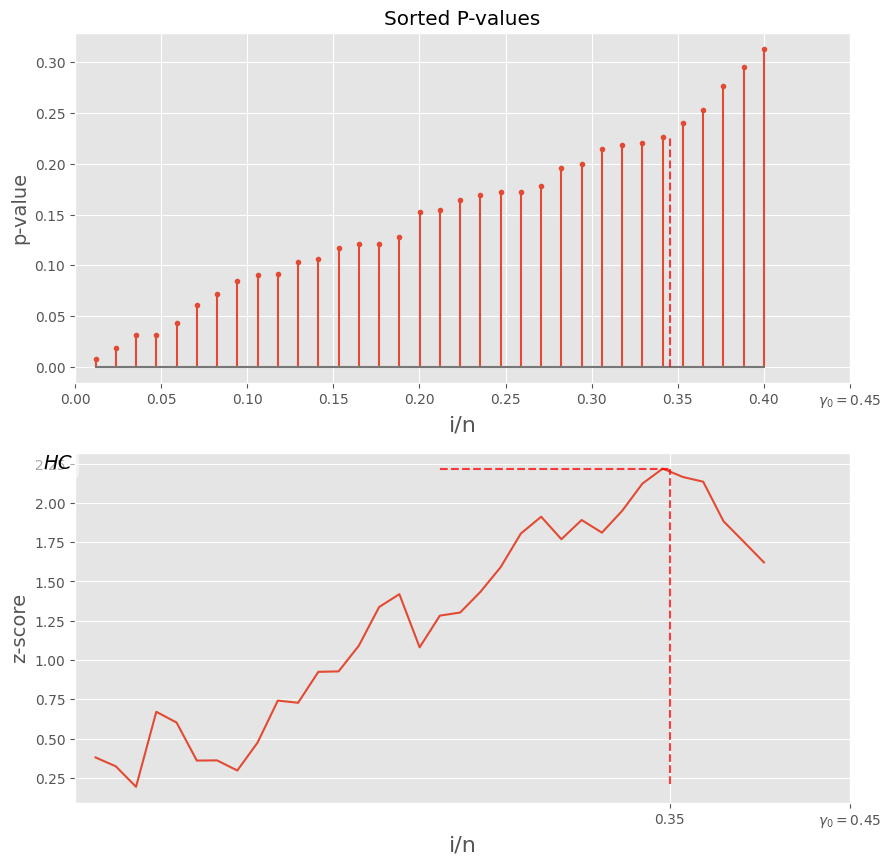

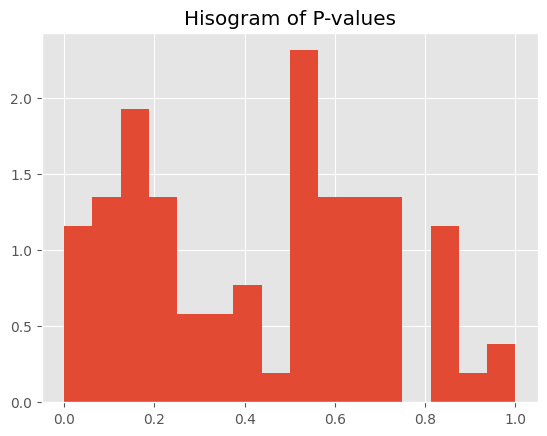

In [70]:
from multitest import MultiTest
pvals = new_pvals
mt = MultiTest(pvals[~np.isnan(pvals)])
mt.hc_dashboard(gamma=0.4)
df_doc1['pvalue'].hist(bins=np.linspace(0,1,17), density=True)
plt.title("Hisogram of P-values")
plt.savefig("pvalue_hist.png")
plt.show()

In [146]:
# load perplexity detector
from src.PerplexityEvaluator import PerplexityEvaluator
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

lm_name = 'gpt2-xl'
tokenizer = AutoTokenizer.from_pretrained(lm_name)
model = AutoModelForCausalLM.from_pretrained(lm_name)

device = 'mps' if torch.backends.mps.is_available() else 'cpu'
model.to(device)

sentence_detector = PerplexityEvaluator(model, tokenizer)

In [147]:
from text_detect import get_survival_function
import yaml

conf_file = "conf.yml"
with open(conf_file, "r") as stream:
    try:
        params = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

null_data_file = params['no-context-null-data-file']
lm_name = params['language-model-name']

df_null = pd.read_csv(null_data_file)

max_tokens_per_sentence = params['max-tokens-per-sentence']
min_tokens_per_sentence = params['min-tokens-per-sentence']

if params['ignore-first-sentence']:
    df_null = df_null[df_null.num > 1]

pval_functions = get_survival_function(df_null, G=params['number-of-interpolation-points'])

In [172]:
df_doc[df_doc.tag == '<edit>']

,Unnamed: 0,sentence,response,pvalue,context,comment,mask,tag,len
4,4,He first began work in the Cubist style initia...,4.109973,0.121012,NaN,OK,False,<edit>,12
8,8,He also repeatedly used egg imagery to symboli...,5.231079,0.037021,NaN,OK,True,<edit>,12
14,14,"He sported a thin Menjou-style mustache, which...",4.538991,0.017729,NaN,OK,True,<edit>,15
22,22,"When Dali turned five, his parents told him th...",3.356762,0.053151,NaN,OK,True,<edit>,26
38,38,He developed a close relationship with the poe...,3.977205,0.006429,NaN,OK,True,<edit>,28
40,40,His work was highly influenced by the work of ...,2.516168,0.608668,NaN,OK,False,<edit>,23
53,53,He met his wife Gala in 1929 and married her i...,2.822442,0.631948,NaN,OK,False,<edit>,16
71,71,Gala continued to serve as an important muse f...,4.022166,0.169930,NaN,OK,False,<edit>,11
76,76,He collaborated with Walt Disney on a film cal...,3.260392,0.268181,NaN,OK,False,<edit>,15
94,94,The French writer Andre Breton denounced Dali ...,3.971388,0.109542,NaN,OK,False,<edit>,16


In [173]:
df_doc.loc[185, :]

Unnamed: 0                                                  185
sentence      Among his most famous designs is the "Mae West...
response                                               3.826988
pvalue                                                 0.066668
context                                                     NaN
comment                                                      OK
mask                                                      False
tag                                                      <edit>
len                                                          44
Name: 185, dtype: object

In [155]:
sent

'When Dali turned five, his parents told him that he was a reincarnation of his sibling, which haunted his life and art until his dying day.'

In [194]:
sent1 = 'When Dali turned five, his parents told him that he was a reincarnation of his sibling, which haunted his life and affected his art until his dying day.'

sent1 = "The French writer Andre Breton, one of the leaders of the surrealist group, in a public letter denounced Dali as a fascist and supporter of Franco and Hilter."
r = sentence_detector(sent1)
r

array(3.1144648, dtype=float32)

In [195]:
l = len(sent1.split())
pval_functions(l, r)

array([[0.06251215]])

In [5]:
df0 =
hc95 = df0['hc'].quantile(0.95)
hc975 = df0['hc'].quantile(0.975)
fisher005 = df0['fisher_pval'].quantile(0.05)
fisher0025 = df0['fisher_pval'].quantile(0.025)

print("HC95 = ", hc95)
print("HC975 = ", hc975)
print("fisher_pval005 = ", fisher005)
print("fisher_pval0025 = ", fisher0025)


NameError: name 'df0' is not defined

In [92]:
print("HC discoveries: ", np.mean(df.hc > hc95))
print("Fisher discoveries: ", np.mean(df.fisher_pval < fisher005))
print("Combined: ", np.mean( (df.hc > hc975) | (df.fisher_pval < fisher0025) ))
print("FD rate: ", np.mean(df.FDP))
print("TD rate: ", np.mean(df.TDP))


HC null discoveries:  0.05102040816326531
Fisher null discoveries:  0.0
HC discoveries:  0.9796954314720813
Fisher discoveries:  0.4365482233502538
Combined:  0.9847715736040609
FD rate:  0.3344527811119749
TD rate:  0.6545723850869264


0.030153015301530153